In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('historical_automobile_sales.csv')

# Display the first few rows of the dataframe
data.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


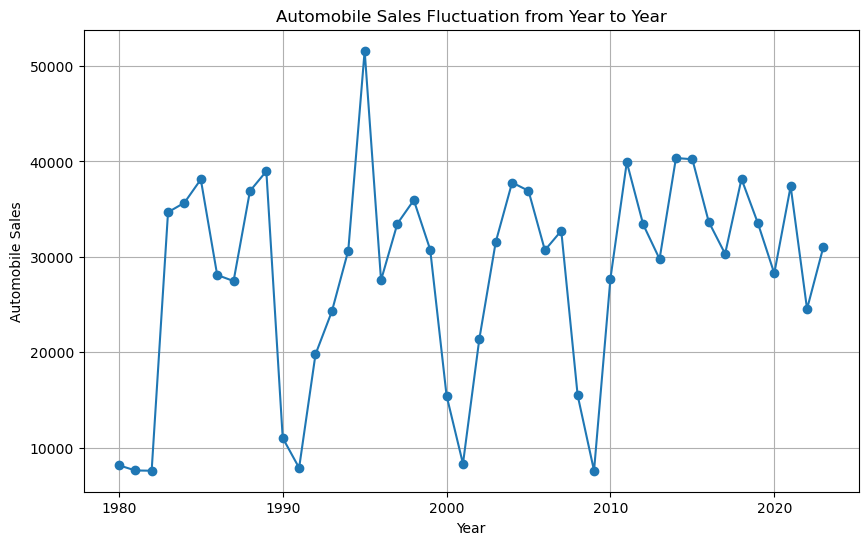

In [20]:
import matplotlib.pyplot as plt

# Task 1.1
sales_per_year = data.groupby('Year')['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(sales_per_year['Year'], sales_per_year['Automobile_Sales'], marker='o')
plt.title('Automobile Sales Fluctuation from Year to Year')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


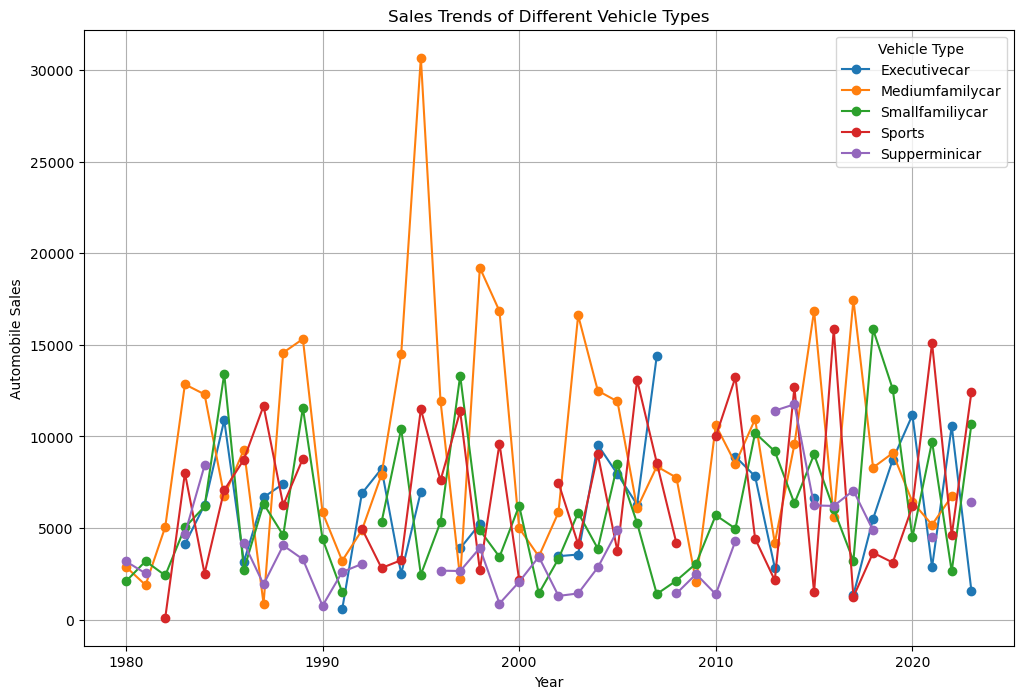

In [22]:
# Task 1.2
vehicle_sales_per_year = data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

plt.figure(figsize=(12, 8))
for vehicle_type in vehicle_sales_per_year.columns:
    plt.plot(vehicle_sales_per_year.index, vehicle_sales_per_year[vehicle_type], marker='o', label=vehicle_type)

plt.title('Sales Trends of Different Vehicle Types')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

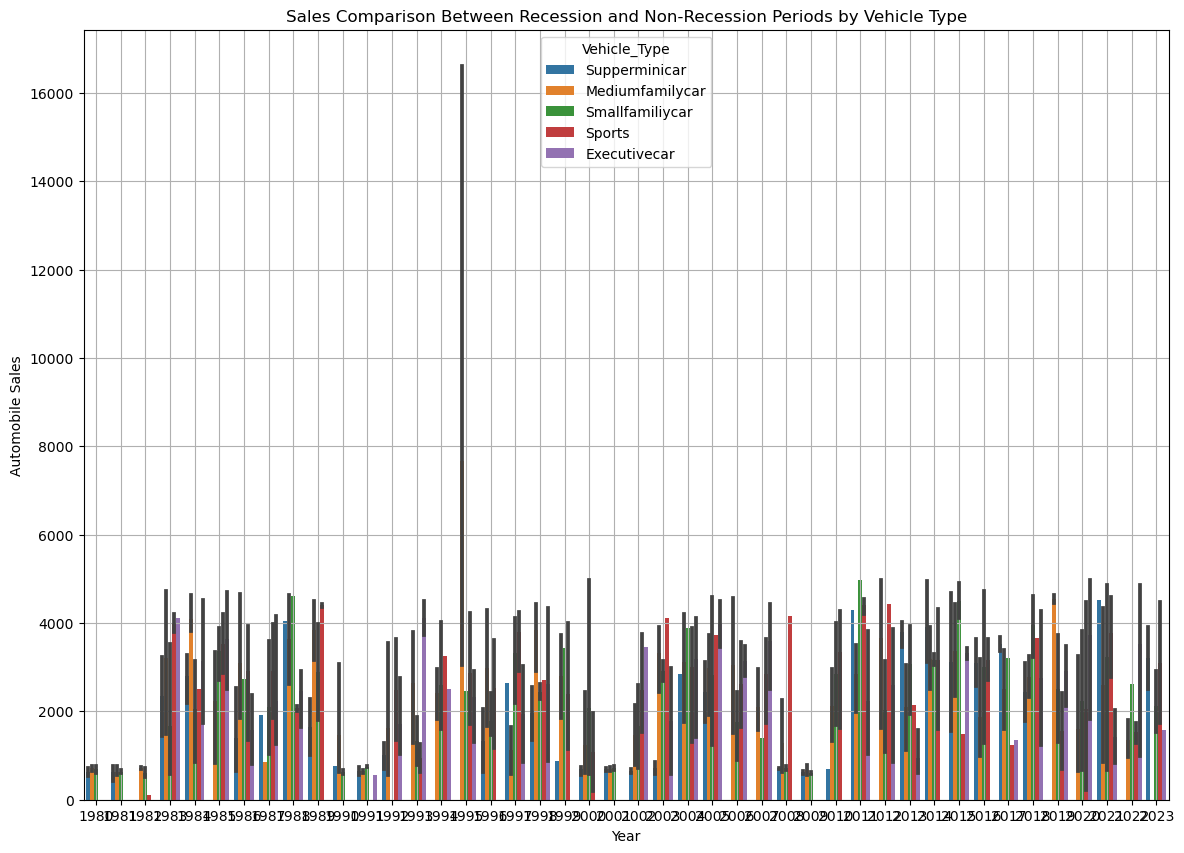

In [64]:
import seaborn as sns

# Task 1.3
data['Recession_Period'] = data['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')

plt.figure(figsize=(14, 10))
sns.barplot(data=data, x='Year', y='Automobile_Sales', hue='Vehicle_Type')

plt.title('Sales Comparison Between Recession and Non-Recession Periods by Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

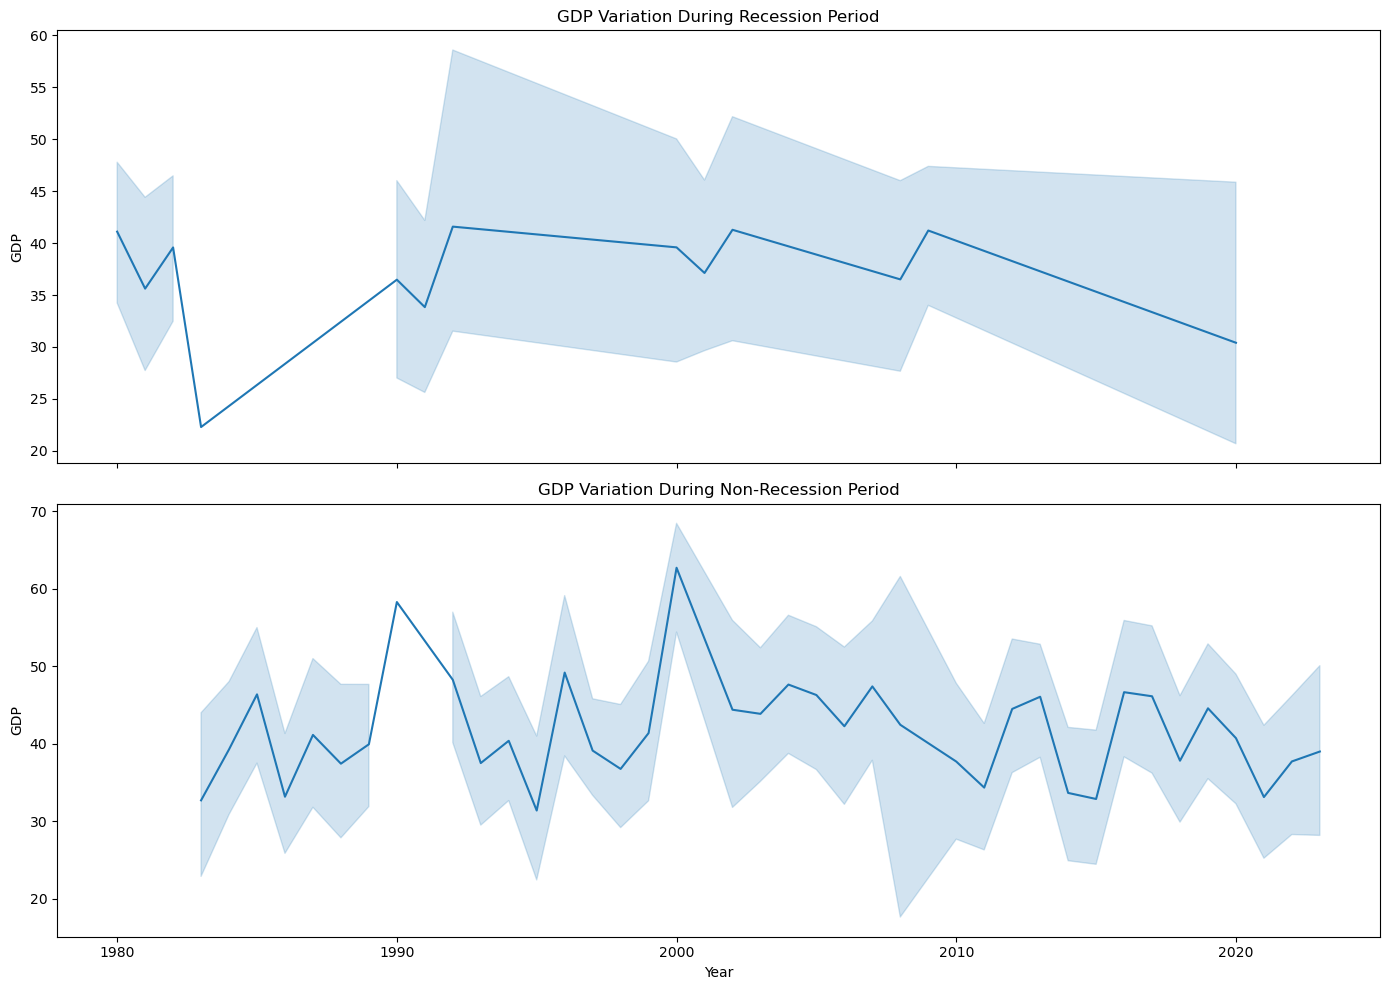

In [26]:
# Task 1.4
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

recession_data = data[data['Recession'] == 1]
non_recession_data = data[data['Recession'] == 0]

sns.lineplot(data=recession_data, x='Year', y='GDP', ax=axes[0])
axes[0].set_title('GDP Variation During Recession Period')
axes[0].set_xlabel('')
axes[0].set_ylabel('GDP')

sns.lineplot(data=non_recession_data, x='Year', y='GDP', ax=axes[1])
axes[1].set_title('GDP Variation During Non-Recession Period')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP')

plt.tight_layout()
plt.show()

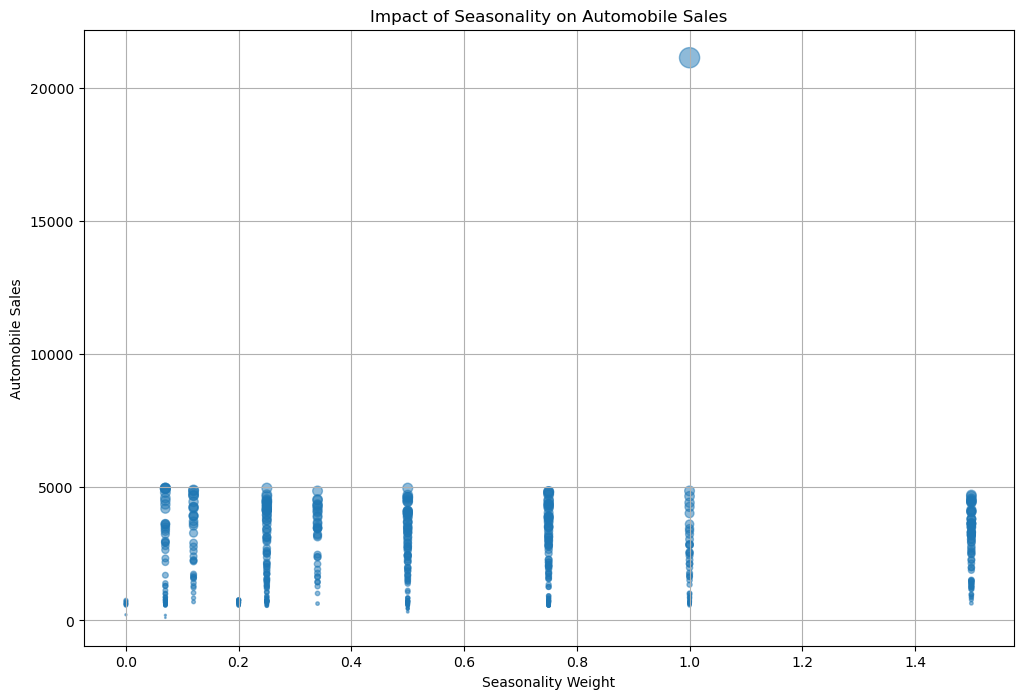

In [28]:
# Task 1.5
plt.figure(figsize=(12, 8))
plt.scatter(data['Seasonality_Weight'], data['Automobile_Sales'], s=data['Automobile_Sales']*0.01, alpha=0.5)
plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Seasonality Weight')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()

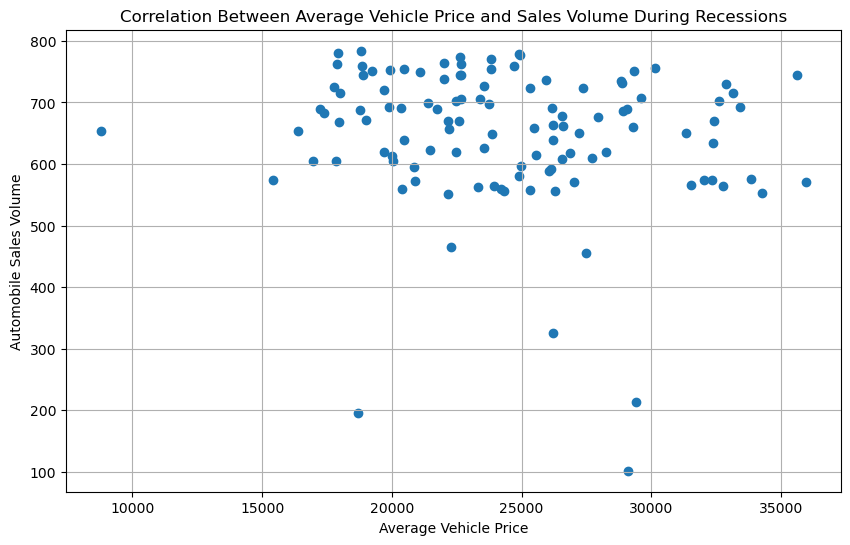

In [30]:
# Task 1.6
recession_data = data[data['Recession'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])
plt.title('Correlation Between Average Vehicle Price and Sales Volume During Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales Volume')
plt.grid(True)
plt.show()

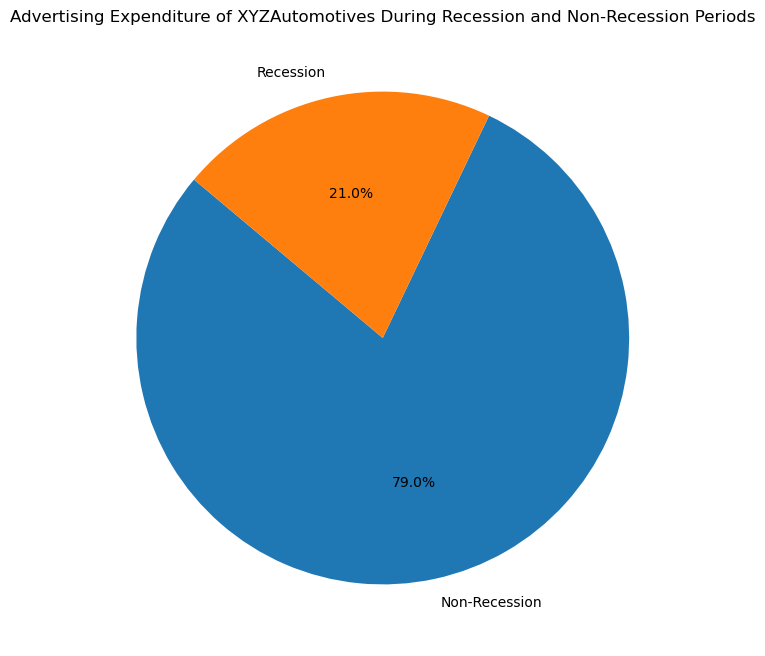

In [32]:
# Task 1.7
ad_expenditure = data.groupby('Recession_Period')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure, labels=ad_expenditure.index, autopct='%1.1f%%', startangle=140)
plt.title('Advertising Expenditure of XYZAutomotives During Recession and Non-Recession Periods')
plt.show()

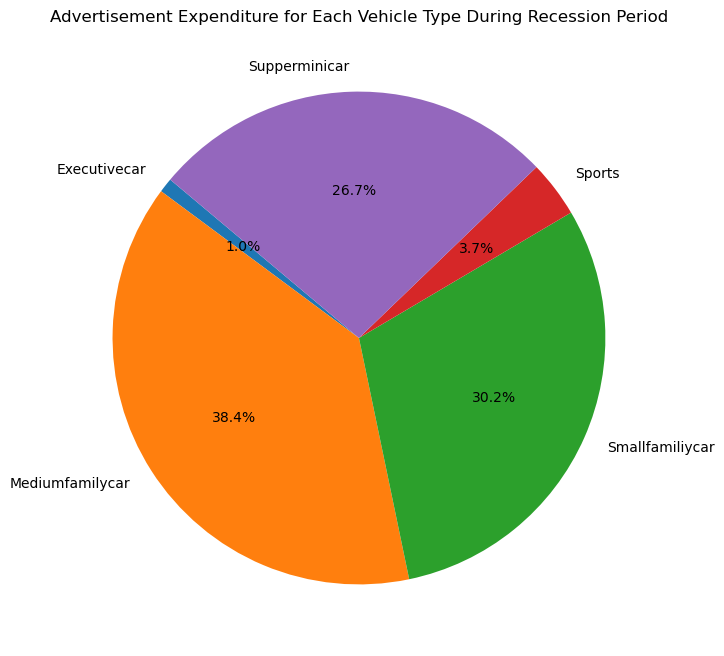

In [34]:
# Task 1.8
recession_ad_expenditure = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 8))
plt.pie(recession_ad_expenditure, labels=recession_ad_expenditure.index, autopct='%1.1f%%', startangle=140)
plt.title('Advertisement Expenditure for Each Vehicle Type During Recession Period')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


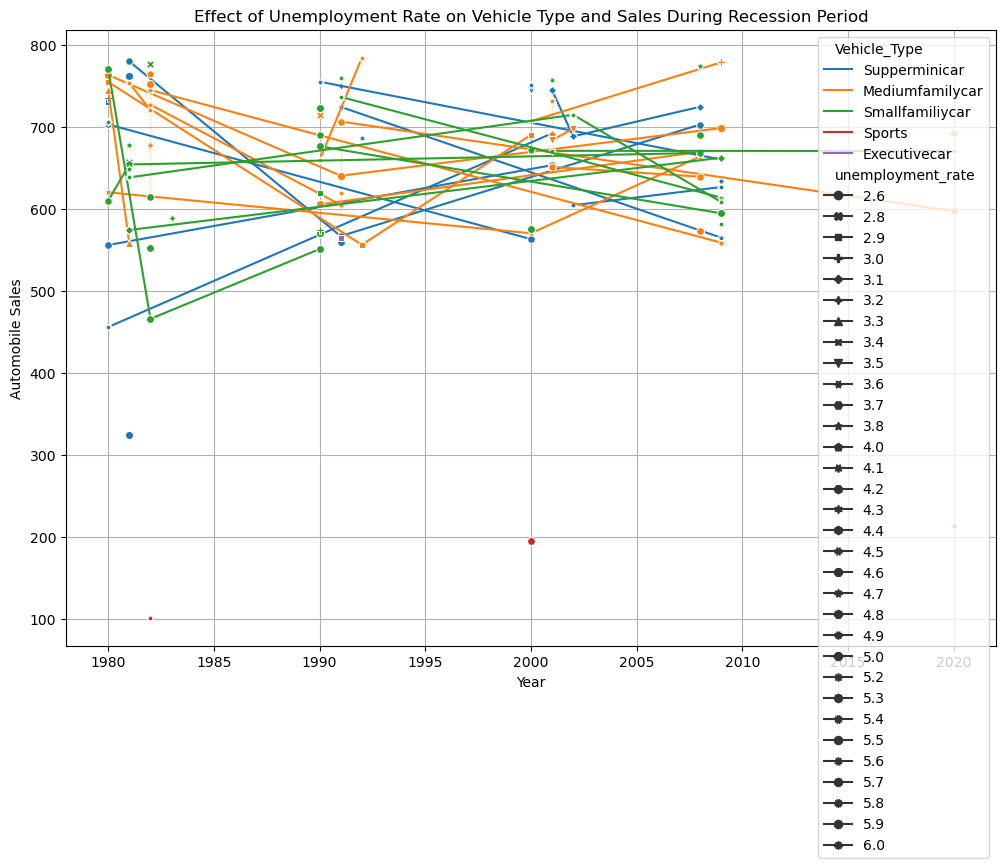

In [36]:
# Task 1.9
plt.figure(figsize=(12, 8))
sns.lineplot(data=recession_data, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='unemployment_rate', markers=True, dashes=False)

plt.title('Effect of Unemployment Rate on Vehicle Type and Sales During Recession Period')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()

In [60]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Sample data for the graphs
df = pd.DataFrame({
    "Year": [2018, 2019, 2020, 2021, 2022],
    "Recession": [1.8, 2.1, -3.5, 6.3, 4.0],
    "Yearly": [2.9, 3.0, 1.8, 2.5, 3.1]
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Task 2.1 - Create a Dash application and give it a meaningful title
app.title = 'Economic Report Dashboard'

# Layout of the app
app.layout = html.Div([
    html.H1('Economic Report Dashboard'),  # Task 2.1 - Meaningful title

    # Task 2.2 - Add drop-downs to your dashboard with appropriate titles and options
    html.Div([
        html.Label('Select Report Type:'),
        dcc.Dropdown(
            id='report-type-dropdown',
            options=[
                {'label': 'Recession Report', 'value': 'Recession'},
                {'label': 'Yearly Report', 'value': 'Yearly'}
            ],
            value='Recession'
        ),
    ]),

    html.Div([
        html.Label('Select Year:'),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': year, 'value': year} for year in df['Year'].unique()],
            value=df['Year'].min()
        ),
    ]),

    # Task 2.3 - Add a division for output display with appropriate 'id' and 'classname' properties
    html.Div(id='output-div', className='output-container'),

    # Task 2.4 - Creating Callbacks; Define the callback function to update the input container
    # based on the selected statistics and the output container
])

# Task 2.4 - Creating Callbacks
@app.callback(
    Output('output-div', 'children'),
    [Input('report-type-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_output(report_type, selected_year):
    filtered_df = df[df['Year'] == selected_year]

    if filtered_df.empty:
        return html.Div("No data available for the selected year.")

    if report_type == 'Recession':
        fig = px.bar(filtered_df, x='Year', y='Recession', title='Recession Report Statistics')
    else:
        fig = px.bar(filtered_df, x='Year', y='Yearly', title='Yearly Report Statistics')

    return dcc.Graph(figure=fig)

# Task 2.5 and 2.6 - Create and display graphs for Recession and Yearly Report Statistics
# This is already handled within the callback above by creating graphs based on the report type

# Run the app on a different port
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)
